#### IMPORTING DEPENDENCIES

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

#### Display Data Frames

In [19]:
df=pd.read_csv("../data/match_0_kill.csv")

In [20]:
df.head(5)

,match_id,player_id,time,kill,assist,gsr,heart_rate,Engagement,Excitement,Stress,...,T8/theta,T8/alpha,T8/betaL,T8/betaH,T8/gamma,AF4/theta,AF4/alpha,AF4/betaL,AF4/betaH,AF4/gamma
0,1,0,0,0,0,NaN,102.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0,1,0,0,NaN,101.333333,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,0,2,0,0,NaN,100.571429,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,0,3,0,0,NaN,99.200000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,0,4,0,0,NaN,98.064516,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Join operation over the GSR Values 

In [21]:
for i in range(5):  # Assuming 5 players, indexed from 0 to 4
    gsr_df = pd.read_csv(f'../data/gsr_{i}.csv')
    gsr_df['time'] = gsr_df['time'].astype(str).str.replace('.0', '', regex=False).astype(int)
    gsr_df.rename(columns={'gsr_value': f'gsr_player_{i}'}, inplace=True)
    match_kill_df = pd.merge(df, gsr_df, on='time', how='left')


In [22]:
match_kill_df

,match_id,player_id,time,kill,assist,gsr_x,heart_rate,Engagement,Excitement,Stress,...,T8/alpha,T8/betaL,T8/betaH,T8/gamma,AF4/theta,AF4/alpha,AF4/betaL,AF4/betaH,AF4/gamma,gsr_y
0,1,0,0,0,0,NaN,102.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25144.281649
1,1,0,1,0,0,NaN,101.333333,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25171.864626
2,1,0,2,0,0,NaN,100.571429,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25098.474293
3,1,0,3,0,0,NaN,99.200000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25186.461510
4,1,0,4,0,0,NaN,98.064516,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25260.695727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15315,1,9,1527,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15316,1,9,1528,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15317,1,9,1529,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15318,1,9,1530,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Relating the EEG Values with the hypothesis

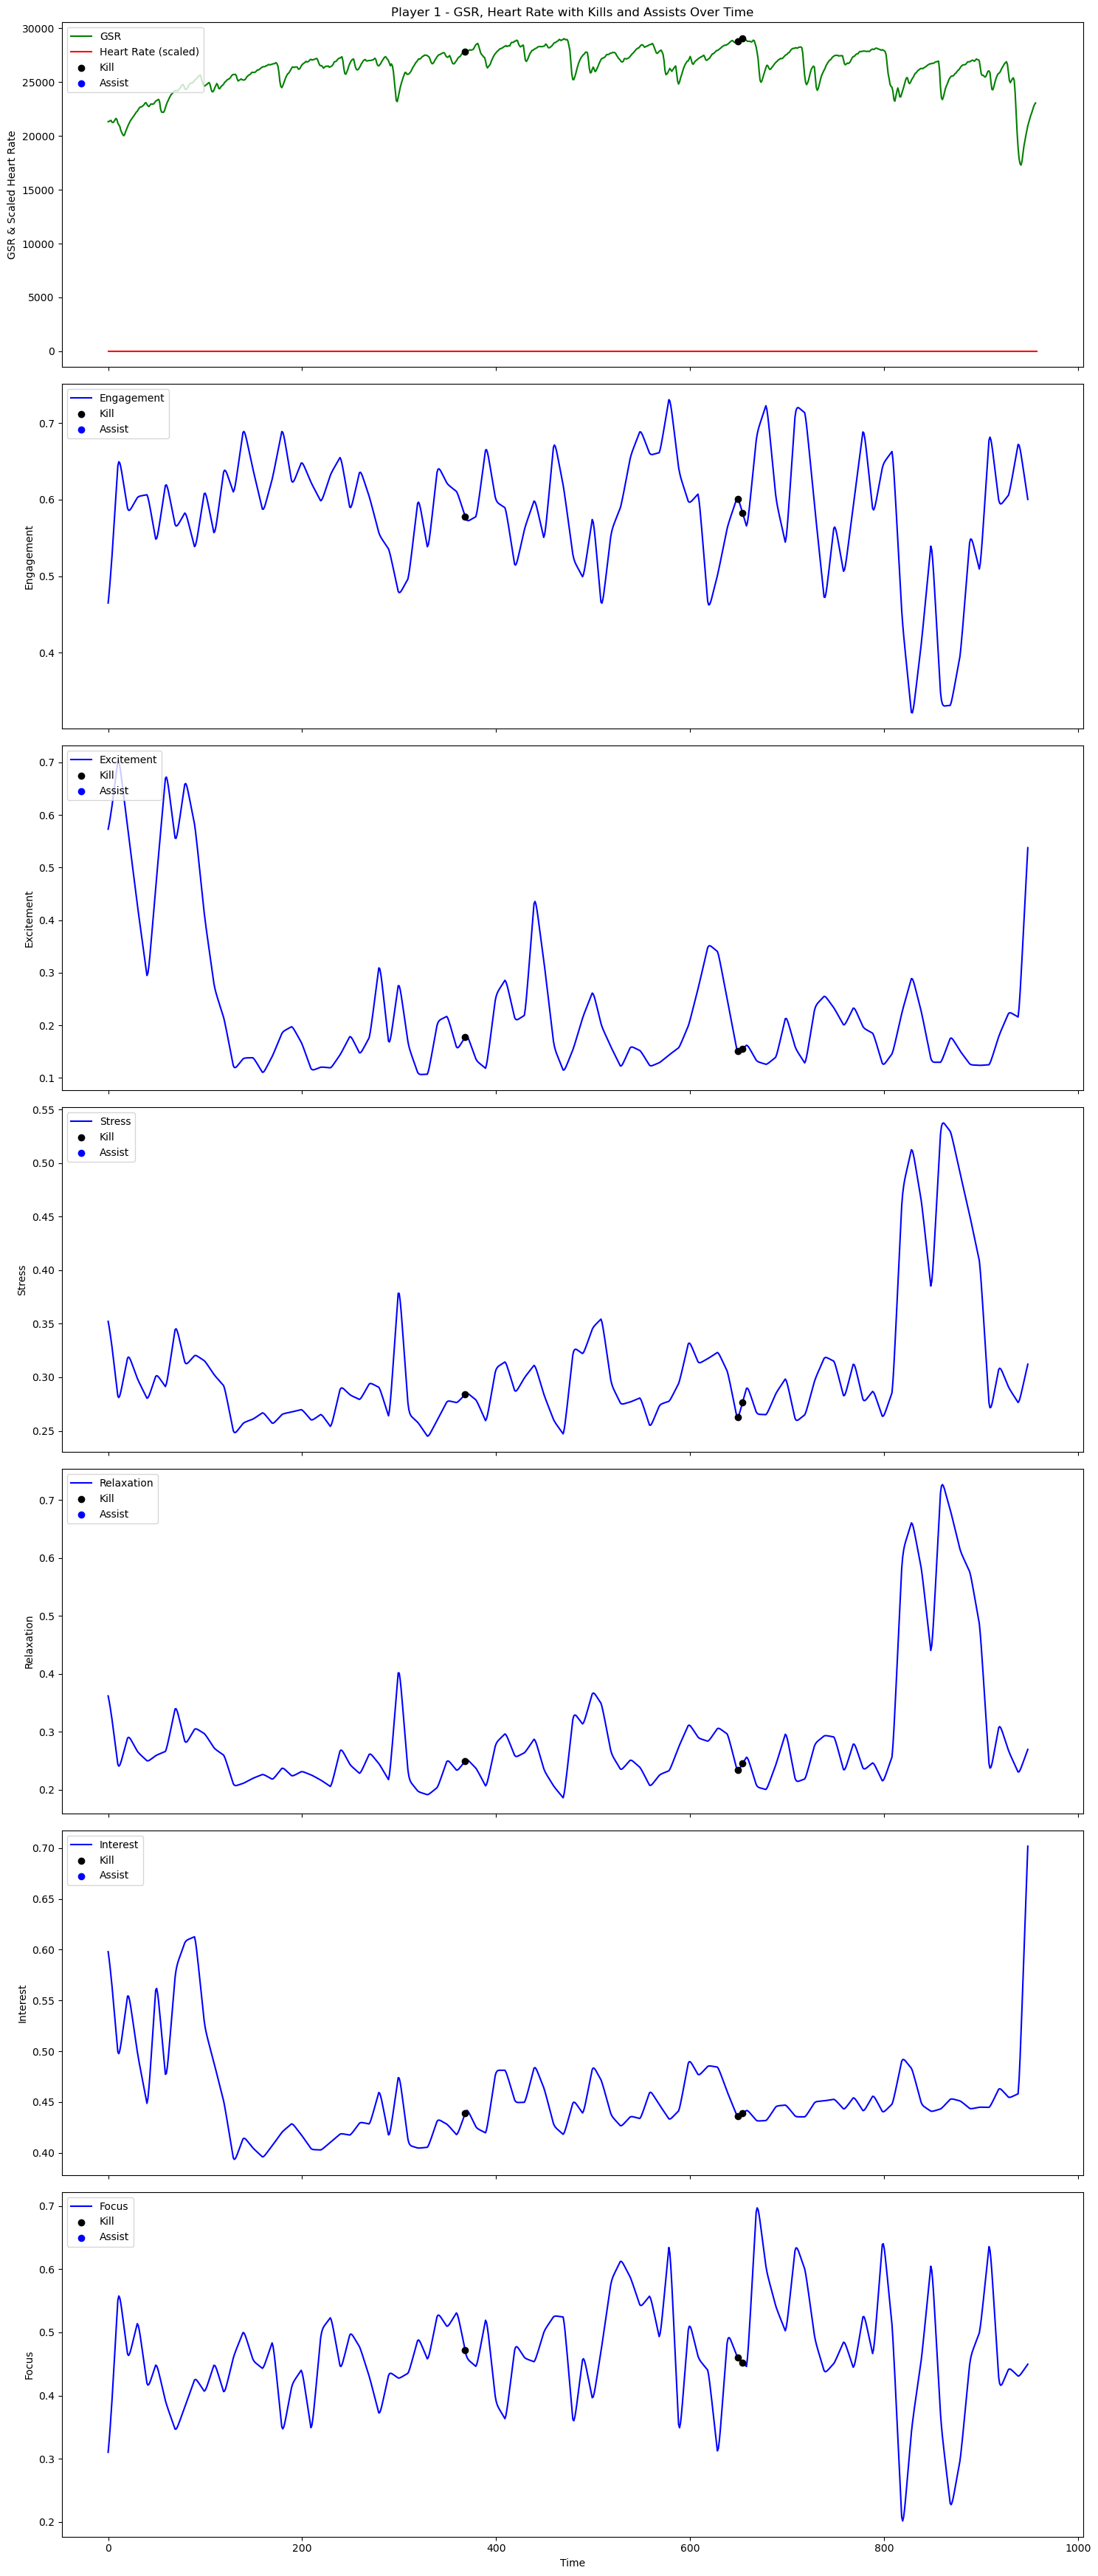

In [23]:
data_df = pd.read_csv('../data/match_0_kill.csv')

import matplotlib.pyplot as plt
import pandas as pd

# Filtering data for Player 1
player_data = data_df[data_df['player_id'] == 1]

# Determine scaling factors to visually align the different metrics on the graphs
gsr_max = player_data['gsr'].max()
heart_rate_scaled_max = player_data['heart_rate'].max() / gsr_max

# Additional metrics to plot
additional_metrics = ['Engagement', 'Excitement', 'Stress', 'Relaxation', 'Interest', 'Focus']

# Create subplots for the base graph and additional metrics
nrows = len(additional_metrics) + 1  # Additional rows for the base graph
fig, axs = plt.subplots(nrows, 1, figsize=(15, 5 * nrows), sharex=True)

# Base graph for GSR, heart rate, kill, and assist
# Plot GSR values on the base graph (axs[0])
axs[0].plot(player_data['time'], player_data['gsr'], label='GSR', color='green')
# Scale and plot Heart rate curve in red on the base graph (axs[0])
axs[0].plot(player_data['time'], player_data['heart_rate'] * heart_rate_scaled_max, label='Heart Rate (scaled)', color='red')
# Mark kills and assists on the base graph (axs[0])
axs[0].scatter(player_data[player_data['kill'] == 1]['time'], 
               player_data[player_data['kill'] == 1]['gsr'], 
               label='Kill', color='black', zorder=5)
axs[0].scatter(player_data[player_data['assist'] == 1]['time'], 
               player_data[player_data['assist'] == 1]['gsr'], 
               label='Assist', color='blue', zorder=5)
axs[0].legend(loc='upper left')
axs[0].set_ylabel('GSR & Scaled Heart Rate')
axs[0].set_title('Player 1 - GSR, Heart Rate with Kills and Assists Over Time')

# Plot each additional metric in a separate subplot
for i, metric in enumerate(additional_metrics):
    # Plot the additional metric on the ith+1 subplot
    axs[i+1].plot(player_data['time'], player_data[metric], label=metric.capitalize(), color='blue')
    # Mark kills and assists on the ith+1 subplot
    axs[i+1].scatter(player_data[player_data['kill'] == 1]['time'], 
                     player_data[player_data['kill'] == 1][metric], 
                     label='Kill', color='black', zorder=5)
    axs[i+1].scatter(player_data[player_data['assist'] == 1]['time'], 
                     player_data[player_data['assist'] == 1][metric], 
                     label='Assist', color='blue', zorder=5)
    axs[i+1].set_ylabel(metric.capitalize())
    axs[i+1].legend(loc='upper left')

# Show the plot
plt.xlabel('Time')
plt.tight_layout()
plt.show()


## Improving the Scaling of Heart rate

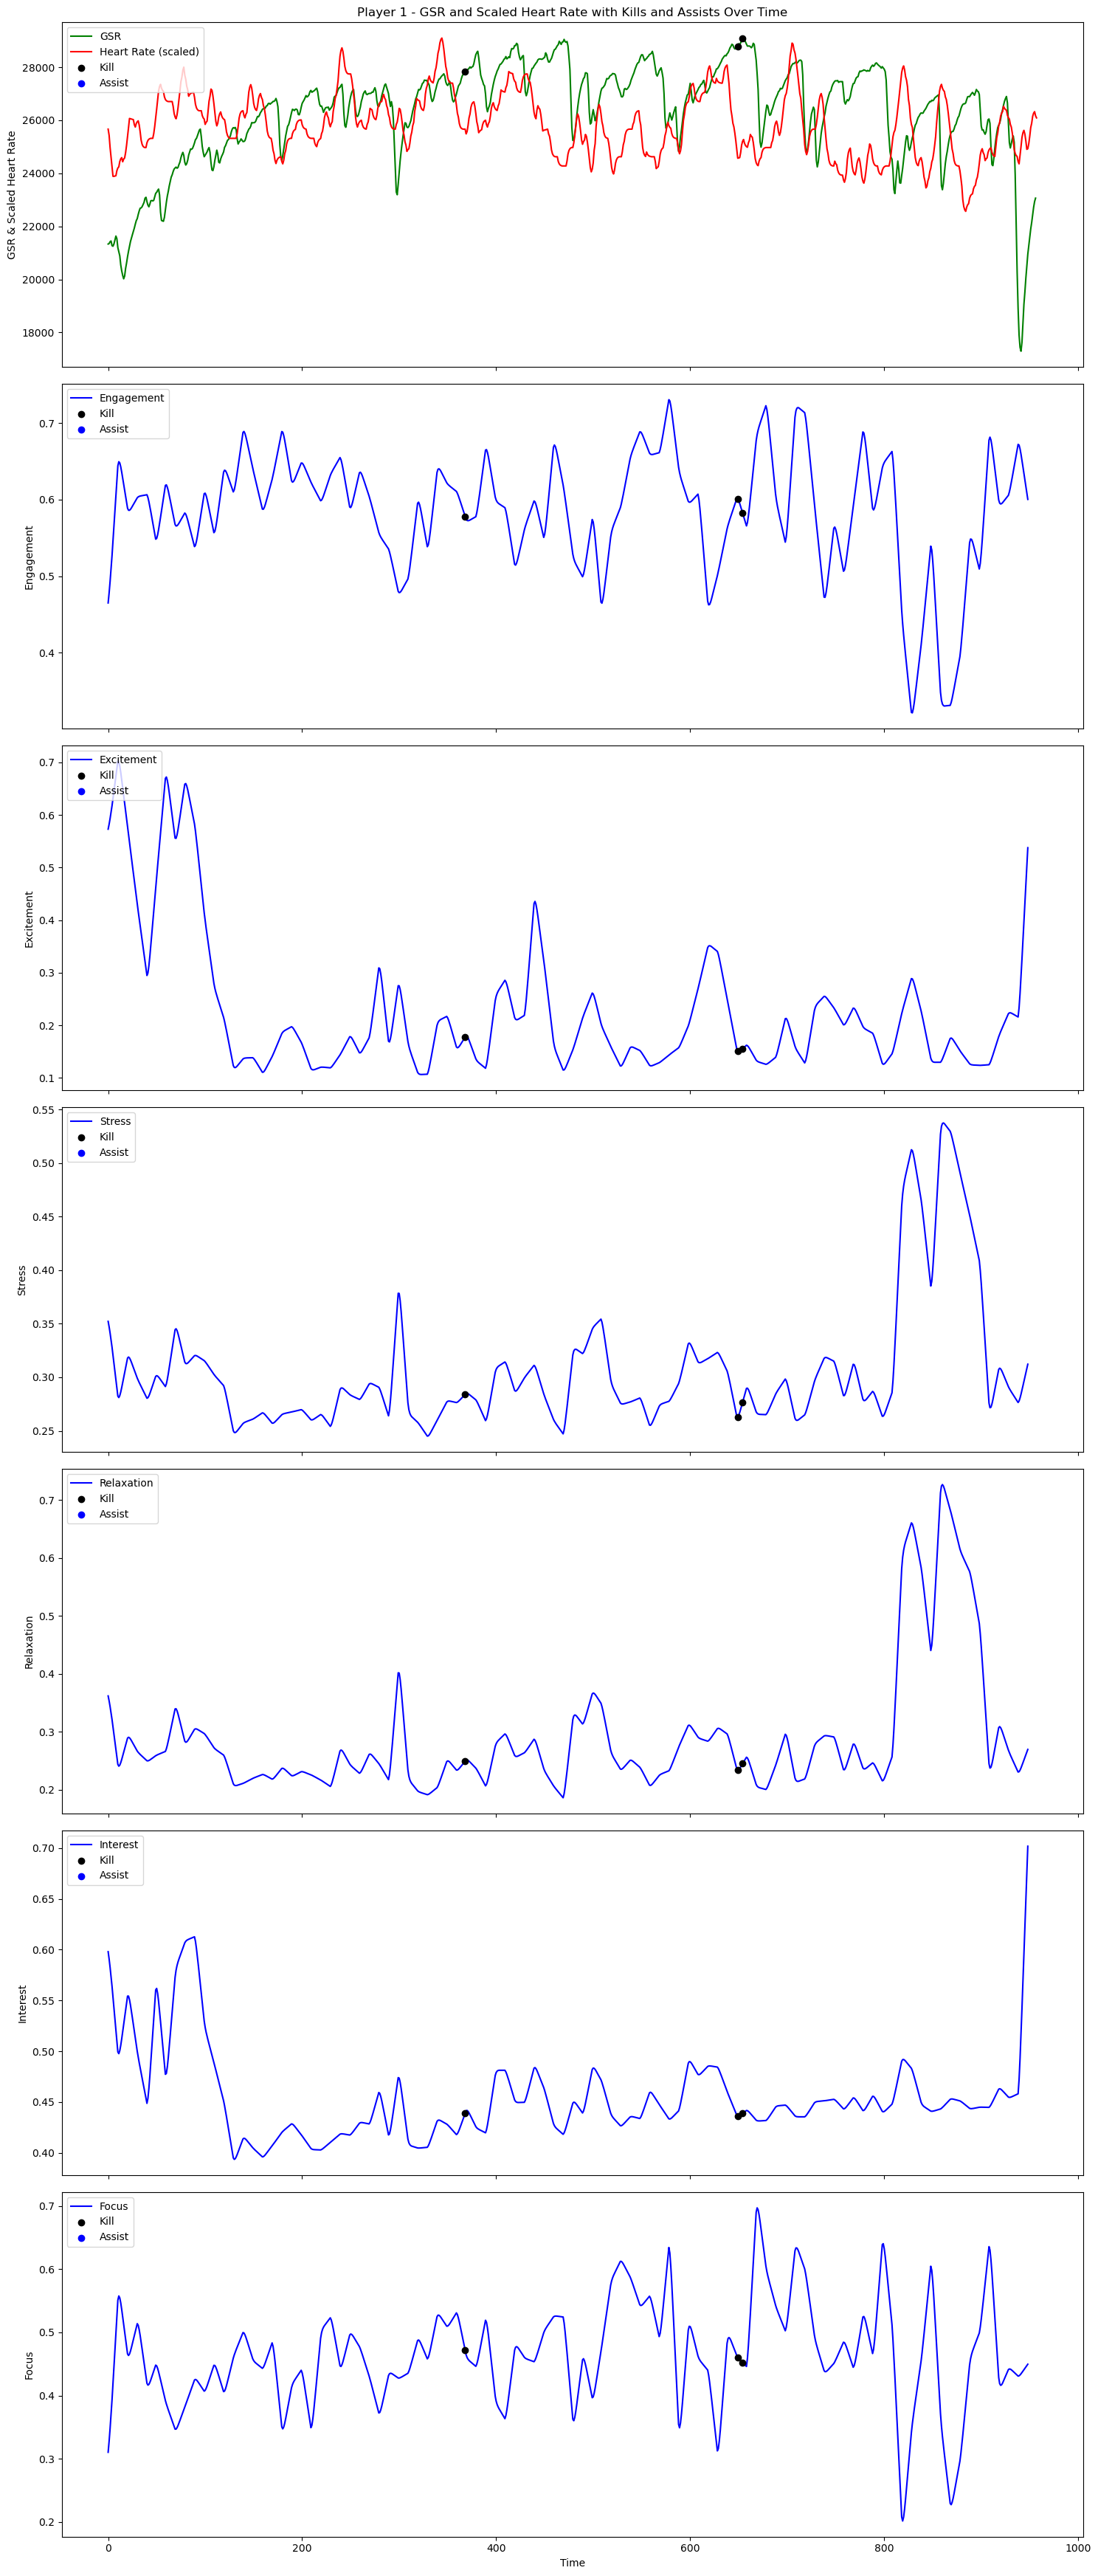

In [24]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the CSV file into a DataFrame
 # Replace with your actual file path

# Filtering data for Player 1
player_data = data_df[data_df['player_id'] == 1]

# Determine a scaling factor for heart rate values to bring them closer to the GSR value range for the first graph
scaling_factor_for_first_graph = player_data['gsr'].max() / player_data['heart_rate'].max()

# Additional metrics to plot
additional_metrics = ['Engagement', 'Excitement', 'Stress', 'Relaxation', 'Interest', 'Focus']

# Create subplots for the base graph and additional metrics
nrows = len(additional_metrics)  # Number of additional metrics
fig, axs = plt.subplots(nrows + 1, 1, figsize=(15, 5 * (nrows + 1)), sharex=True)

# Plot the base graph of GSR and scaled heart rate
# Plot GSR values and scaled Heart rate curve on the first subplot
axs[0].plot(player_data['time'], player_data['gsr'], label='GSR', color='green')
axs[0].plot(player_data['time'], player_data['heart_rate'] * scaling_factor_for_first_graph, label='Heart Rate (scaled)', color='red')
# Mark kills and assists on the first subplot
axs[0].scatter(player_data[player_data['kill'] == 1]['time'], 
               player_data[player_data['kill'] == 1]['gsr'], 
               label='Kill', color='black', zorder=5)
axs[0].scatter(player_data[player_data['assist'] == 1]['time'], 
               player_data[player_data['assist'] == 1]['gsr'], 
               label='Assist', color='blue', zorder=5)
axs[0].legend(loc='upper left')
axs[0].set_ylabel('GSR & Scaled Heart Rate')
axs[0].set_title('Player 1 - GSR and Scaled Heart Rate with Kills and Assists Over Time')

# Plot each additional metric in a separate subplot below the base graph
for i, metric in enumerate(additional_metrics):
    # Plot the additional metric on the ith+1 subplot
    axs[i+1].plot(player_data['time'], player_data[metric], label=metric, color='blue')
    # Mark kills and assists on the ith+1 subplot 
    axs[i+1].scatter(player_data[player_data['kill'] == 1]['time'], 
                     player_data[player_data['kill'] == 1][metric], 
                     label='Kill', color='black', zorder=5)
    axs[i+1].scatter(player_data[player_data['assist'] == 1]['time'], 
                     player_data[player_data['assist'] == 1][metric], 
                     label='Assist', color='blue', zorder=5)
    axs[i+1].set_ylabel(metric)
    axs[i+1].legend(loc='upper left')

# Show the plot
plt.xlabel('Time')
plt.tight_layout()
plt.show()


## Tonic and Phasic GSR

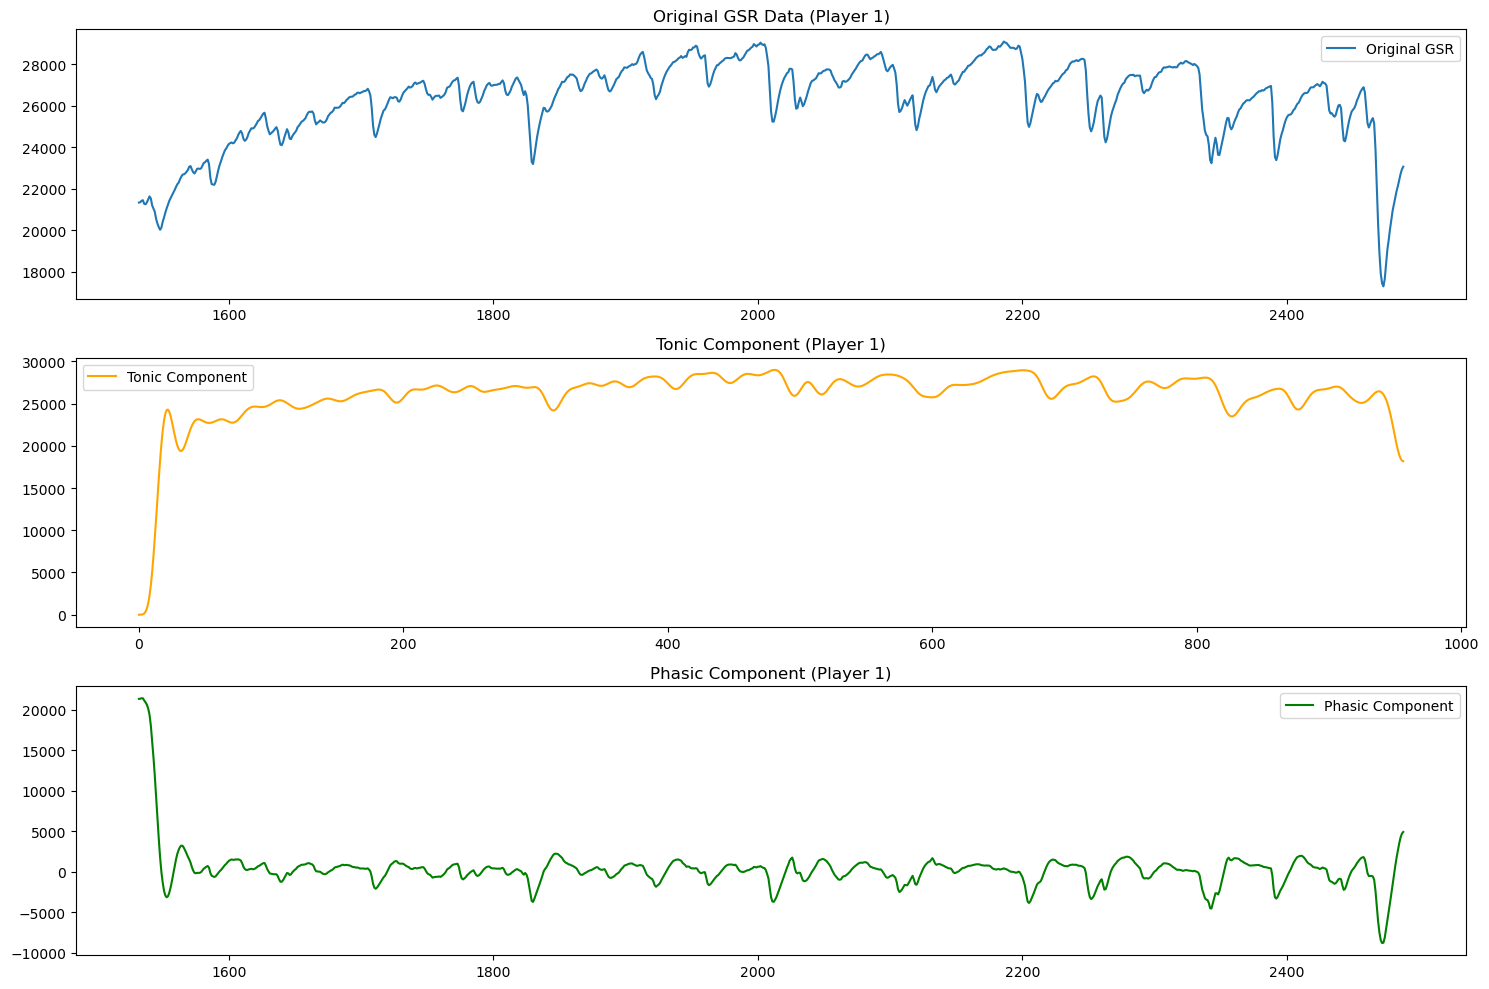

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter

# Load the GSR data from a CSV file
# Make sure to update the file path and column name according to your dataset
df = pd.read_csv('../data/match_0_kill.csv')

# Filter the DataFrame for Player 1 only
df_player1 = df[df['player_id'] == 1]

# Update the sampling rate (fs) according to your data's sampling frequency
fs = 1.0  # The sampling frequency in Hz

# Try adjusting the lowcut frequency to better separate the tonic component
lowcut = 0.05  # Low cut frequency for the tonic component, adjust this as needed

# Butterworth filter for signal processing
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

# Ensure 'gsr' column exists in df_player1 before applying the filter
if 'gsr' in df_player1.columns:
    # Apply the low-pass filter to get the tonic component for Player 1
    tonic = butter_lowpass_filter(df_player1['gsr'], lowcut, fs, order=6)

    # The phasic component is the original signal minus the tonic component for Player 1
    phasic = df_player1['gsr'] - tonic

    # Plotting
    plt.figure(figsize=(15, 10))

    # Original GSR data for Player 1
    plt.subplot(3, 1, 1)
    plt.plot(df_player1['gsr'], label='Original GSR')
    plt.title('Original GSR Data (Player 1)')
    plt.legend()

    # Tonic Component for Player 1
    plt.subplot(3, 1, 2)
    plt.plot(tonic, label='Tonic Component', color='orange')
    plt.title('Tonic Component (Player 1)')
    plt.legend()

    # Phasic Component for Player 1
    plt.subplot(3, 1, 3)
    plt.plot(phasic, label='Phasic Component', color='green')
    plt.title('Phasic Component (Player 1)')
    plt.legend()

    plt.tight_layout()
    plt.show()
else:
    print("The 'gsr' column is missing from the dataset for Player 1.")


## 1
### Tonic Component Graph: By examining the trend in the tonic component, you can assess how the participant's baseline arousal level changes over time. An increasing trend might suggest growing tension or stress, while a decreasing trend could indicate relaxation.
## 2
### Phasic Component Graph: Looking at the peaks in the phasic component can help you identify moments of acute response. The presence, frequency, and magnitude of these peaks can be linked back to specific events, offering insights into the participant's reactions.

## Relating the Tonic and Phasic GSR data to Kills and Assists

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter

# Load the GSR data from a CSV file
df = pd.read_csv('match_0_kill.csv')

# Assuming 'time' column exists and is in the correct format for plotting
# Convert 'time' to datetime format if it's not already
df['time'] = pd.to_datetime(df['time'])

# Filter the DataFrame for Player 1 only
df_player1 = df[df['player_id'] == 1]

# Update the sampling rate (fs) according to your data's sampling frequency
fs = 1.0  # The sampling frequency in Hz, adjust this based on your data

# Try adjusting the lowcut frequency to better separate the tonic component
lowcut = 0.05  # Low cut frequency for the tonic component, adjust this as needed

# Butterworth filter for signal processing
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

# Check if 'gsr' column exists in df_player1 before applying the filter
if 'gsr' in df_player1.columns:
    # Apply the low-pass filter to get the tonic component for Player 1
    tonic = butter_lowpass_filter(df_player1['gsr'], lowcut, fs, order=6)

    # The phasic component is the original signal minus the tonic component for Player 1
    phasic = df_player1['gsr'] - tonic

    # Plotting
    plt.figure(figsize=(15, 10))

    # Original GSR data for Player 1 with time, kills, and assists
    plt.subplot(3, 1, 1)
    plt.plot(df_player1['time'], df_player1['gsr'], label='Original GSR')
    # Plotting kill and assist as scatter plots on the GSR graph
    # We use np.max(df_player1['gsr']) to scale the kill and assist markers
    plt.scatter(df_player1[df_player1['kill'] > 0]['time'], [np.max(df_player1['gsr'])] * len(df_player1[df_player1['kill'] > 0]), label='Kill', color='red')
    plt.scatter(df_player1[df_player1['assist'] > 0]['time'], [np.max(df_player1['gsr']) * 0.95] * len(df_player1[df_player1['assist'] > 0]), label='Assist', color='blue')
    plt.title('Original GSR Data (Player 1)')
    plt.legend()

    # Tonic Component for Player 1 with time
    plt.subplot(3, 1, 2)
    plt.plot(df_player1['time'], tonic, label='Tonic Component', color='orange')
    plt.title('Tonic Component (Player 1)')
    plt.legend()

    # Phasic Component for Player 1 with time
    plt.subplot(3, 1, 3)
    plt.plot(df_player1['time'], phasic, label='Phasic Component', color='green')
    plt.title('Phasic Component (Player 1)')
    plt.legend()

    plt.tight_layout()
    plt.show()
else:
    print("The 'gsr' column is missing from the dataset for Player 1.")


FileNotFoundError: [Errno 2] No such file or directory: 'match_0_kill.csv'

## Correlating the Kills and Assists and also scaling the time intervals

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter

# Load the GSR data from a CSV file
df = pd.read_csv('match_0_kill.csv')

# Filter the DataFrame for Player 1 only
df_player1 = df[df['player_id'] == 1]

# Calculate elapsed time in seconds from the start
elapsed_time = df_player1['time'] - df_player1['time'].iloc[0]

# Define the sampling rate and the low cut frequency for the tonic component
fs = 1.0  # Adjust based on your data
lowcut = 0.05

# Define Butterworth filter for signal processing
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

if 'gsr' in df_player1.columns:
    # Apply the low-pass filter to obtain the tonic component
    tonic = butter_lowpass_filter(df_player1['gsr'], lowcut, fs, order=6)

    # Calculate the phasic component as the difference between the original and tonic components
    phasic = df_player1['gsr'] - tonic

    # Plotting
    plt.figure(figsize=(15, 10))

    # Plot original GSR data
    ax1 = plt.subplot(3, 1, 1)
    ax1.plot(elapsed_time, df_player1['gsr'], label='Original GSR')
    ax1.scatter(elapsed_time[df_player1['kill'] > 0], [np.max(df_player1['gsr'])] * len(df_player1[df_player1['kill'] > 0]), label='Kill', color='red')
    ax1.scatter(elapsed_time[df_player1['assist'] > 0], [np.max(df_player1['gsr']) * 0.95] * len(df_player1[df_player1['assist'] > 0]), label='Assist', color='blue')
    ax1.set_title('Original GSR Data (Player 1)')
    ax1.set_xlabel('Time (seconds)')
    ax1.legend()

    # Plot tonic component and mark kill and assist events
    ax2 = plt.subplot(3, 1, 2, sharex=ax1)
    ax2.plot(elapsed_time, tonic, label='Tonic Component', color='orange')
    ax2.scatter(elapsed_time[df_player1['kill'] > 0], [np.max(tonic)] * len(df_player1[df_player1['kill'] > 0]), label='Kill', color='red')
    ax2.scatter(elapsed_time[df_player1['assist'] > 0], [np.max(tonic) * 0.95] * len(df_player1[df_player1['assist'] > 0]), label='Assist', color='blue')
    ax2.set_title('Tonic Component (Player 1)')
    ax2.set_xlabel('Time (seconds)')
    ax2.legend()

    # Plot phasic component and mark kill and assist events
    ax3 = plt.subplot(3, 1, 3, sharex=ax1)
    ax3.plot(elapsed_time, phasic, label='Phasic Component', color='green')
    ax3.scatter(elapsed_time[df_player1['kill'] > 0], [np.max(phasic)] * len(df_player1[df_player1['kill'] > 0]), label='Kill', color='red')
    ax3.scatter(elapsed_time[df_player1['assist'] > 0], [np.max(phasic) * 0.95] * len(df_player1[df_player1['assist'] > 0]), label='Assist', color='blue')
    ax3.set_title('Phasic Component (Player 1)')
    ax3.set_xlabel('Time (seconds)')
    ax3.legend()

    plt.tight_layout()
    plt.show()
else:
    print("The 'gsr' column is missing from the dataset for Player 1.")


## 1
Tonic Component Graph: By examining the trend in the tonic component, you can assess how the participant's baseline arousal level changes over time. An increasing trend might suggest growing tension or stress, while a decreasing trend could indicate relaxation.
## 2
Phasic Component Graph: Looking at the peaks in the phasic component can help you identify moments of acute response. The presence, frequency, and magnitude of these peaks can be linked back to specific events, offering insights into the participant's reactions.

## Player 1 data

In [ ]:
df_player1 = df[df['player_id'] == 1]

In [ ]:
df_player1.head(15)

- Theta (4-7 Hz): Increased theta activity is often associated with states of relaxation, meditativeness, and drowsiness.
- Alpha (8-13 Hz): Alpha waves are associated with a state of wakeful relaxation with closed eyes and can indicate relaxation and decreased cognitive load.
- Beta (13-30 Hz): Higher beta activity can be a sign of active, busy, or anxious thinking and active concentration.
- Gamma (>30 Hz): Gamma waves are related to higher mental activity, including perception, problem-solving, and consciousness.

## Statistical Analysis for the engagement rate

Calculating the number of dips in GSR and spikes in Heart Rate

In [ ]:
import pandas as pd
import numpy as np
from scipy.signal import find_peaks

# Function to reverse the signal for finding dips as peaks
def find_dips(data):
    reversed_data = -1 * data  # Multiply by -1 to reverse
    dips, _ = find_peaks(reversed_data)
    return dips

# Parameters
window_before = 10  # Seconds before the event
window_after = 10  # Seconds after the event

# Initialize counters
gsr_dips_count = 0
hr_peaks_count = 0

# Iterate over each kill event
kill_times = df_player1['time'][df_player1['kill'] > 0]

for kill_time in kill_times:
    start_time = kill_time - window_before
    end_time = kill_time + window_after
    
    # Extract segment around the kill event
    segment = df_player1[(df_player1['time'] >= start_time) & (df_player1['time'] <= end_time)]
    
    # Check if segment is long enough
    if len(segment) < (window_before + window_after + 1):
        continue
    
    # GSR dips
    gsr_data = segment['gsr'].values
    gsr_dips = find_dips(gsr_data)
    gsr_dips_count += len(gsr_dips)
    
    # Heart rate peaks
    hr_data = segment['heart_rate'].values
    hr_peaks, _ = find_peaks(hr_data)
    hr_peaks_count += len(hr_peaks)

print(f'Number of GSR dips around kills: {gsr_dips_count}')
print(f'Number of heart rate peaks around kills: {hr_peaks_count}')


## Finding the p-value via T-test

In [ ]:
import pandas as pd
import numpy as np
from scipy.signal import find_peaks
from scipy.stats import ttest_ind

# Function to reverse the signal for finding dips as peaks
def find_dips(data):
    reversed_data = -1 * data  # Multiply by -1 to reverse
    dips, _ = find_peaks(reversed_data)
    return dips

# Function to extract segments not around kill events for baseline comparison
def extract_baseline_segments(df, event_column, time_column, window):
    baseline_segments = []
    event_times = df[time_column][df[event_column] > 0].values
    for _ in range(len(event_times)):
        while True:
            random_time = np.random.uniform(df[time_column].min() + window, df[time_column].max() - window)
            if all(abs(random_time - et) > window for et in event_times):
                start_time = random_time - window
                end_time = random_time + window
                segment = df[(df[time_column] >= start_time) & (df[time_column] <= end_time)]
                baseline_segments.append(segment)
                break
    return baseline_segments

window_before = 10  # Seconds before the event
window_after = 10  # Seconds after the event

# Initialize counters
gsr_dips_count = 0
hr_peaks_count = 0

kill_segments = []
baseline_segments = extract_baseline_segments(df_player1, 'kill', 'time', window_before)

# Process kill segments
kill_times = df_player1['time'][df_player1['kill'] > 0]
for kill_time in kill_times:
    start_time = kill_time - window_before
    end_time = kill_time + window_after
    segment = df_player1[(df_player1['time'] >= start_time) & (df_player1['time'] <= end_time)]
    kill_segments.append(segment)
    if len(segment) < (window_before + window_after + 1):
        continue
    gsr_dips_count += len(find_dips(segment['gsr'].values))
    hr_peaks_count += len(find_peaks(segment['heart_rate'].values)[0])

# Process baseline segments for counting
baseline_gsr_dips_count = 0
baseline_hr_peaks_count = 0
for segment in baseline_segments:
    baseline_gsr_dips_count += len(find_dips(segment['gsr'].values))
    baseline_hr_peaks_count += len(find_peaks(segment['heart_rate'].values)[0])

# Calculate averages and handle division by zero
kill_gsr_dips_avg = gsr_dips_count / len(kill_segments) if len(kill_segments) > 0 else None
kill_hr_peaks_avg = hr_peaks_count / len(kill_segments) if len(kill_segments) > 0 else None

baseline_gsr_dips_avg = baseline_gsr_dips_count / len(baseline_segments) if len(baseline_segments) > 0 else None
baseline_hr_peaks_avg = baseline_hr_peaks_count / len(baseline_segments) if len(baseline_segments) > 0 else None

# Perform statistical tests if valid
if kill_gsr_dips_avg is not None and baseline_gsr_dips_avg is not None:
    gsr_p_value = ttest_ind([len(find_dips(seg['gsr'].values)) for seg in kill_segments],
                            [len(find_dips(seg['gsr'].values)) for seg in baseline_segments], nan_policy='omit').pvalue
else:
    gsr_p_value = None

if kill_hr_peaks_avg is not None and baseline_hr_peaks_avg is not None:
    hr_p_value = ttest_ind([len(find_peaks(seg['heart_rate'].values)[0]) for seg in kill_segments],
                           [len(find_peaks(seg['heart_rate'].values)[0]) for seg in baseline_segments], nan_policy='omit').pvalue
else:
    hr_p_value = None

print(f'Average GSR dips around kills: {kill_gsr_dips_avg} vs. baseline: {baseline_gsr_dips_avg}')
print(f'Average HR peaks around kills: {kill_hr_peaks_avg} vs. baseline: {baseline_hr_peaks_avg}')
print(f'GSR Dips Change Significance p-value: {gsr_p_value}')
print(f'HR Peaks Change Significance p-value: {hr_p_value}')


## P- Value Example and Definition

The p-value is like a tool that helps you decide if the differences you observe (like test scores between two groups) are strong enough to say something meaningful, or if they could just be random fluctuations.

## Group A (New Method): Scores = 90, 92, 95, 88, 96
    
  
  
## Group B (Traditional Method): Scores = 85, 87, 84, 88, 86
  
  Group A did better - actually intelligent or just luck ?

In [ ]:
import matplotlib.pyplot as plt

def plot_segment_peaks_dips(segment, title):
    # Time values could be relative indices if 'time' is not in the segment
    time_indices = range(len(segment))
    
    # GSR plot
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    plt.plot(time_indices, segment['gsr'], label='GSR', color='blue')
    gsr_dips_indices = find_dips(segment['gsr'].values)
    plt.scatter(gsr_dips_indices, segment['gsr'].iloc[gsr_dips_indices], color='red', label='Dips')
    plt.title(f'GSR with Dips - {title}')
    plt.xlabel('Time Index')
    plt.ylabel('GSR')
    plt.legend()

    # Heart Rate plot
    plt.subplot(1, 2, 2)
    plt.plot(time_indices, segment['heart_rate'], label='Heart Rate', color='green')
    hr_peaks_indices, _ = find_peaks(segment['heart_rate'].values)
    plt.scatter(hr_peaks_indices, segment['heart_rate'].iloc[hr_peaks_indices], color='orange', label='Peaks')
    plt.title(f'Heart Rate with Peaks - {title}')
    plt.xlabel('Time Index')
    plt.ylabel('Heart Rate')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Select a representative segment for each condition (around kills and baseline) for visualization
if kill_segments:
    plot_segment_peaks_dips(kill_segments[0], 'Around Kills')

if baseline_segments:
    plot_segment_peaks_dips(baseline_segments[0], 'Baseline')


## Analysing other CSV files

In [ ]:
import pandas as pd
import numpy as np
from scipy.signal import find_peaks

# Function to reverse the signal for finding dips as peaks
def find_dips(data):
    reversed_data = -1 * data  # Multiply by -1 to reverse
    dips, _ = find_peaks(reversed_data)
    return dips

# Parameters
window_before = 10  # Seconds before the event
window_after = 10  # Seconds after the event

# Define the base directory where CSV files are stored
base_directory = '/Users/narenkhatwani/Desktop/is_script/augmented_match_data/'

# List of matches with full paths
matches = [
    base_directory + 'match_1_augmented.csv',
    base_directory + 'match_2_augmented.csv',
    base_directory + 'match_3_augmented.csv',
    base_directory + 'match_4_augmented.csv',
    base_directory + 'match_5_augmented.csv',
    base_directory + 'match_6_augmented.csv'
]

# Initialize dictionary to store results
results = {}

# Iterate over each match file
for match in matches:
    df = pd.read_csv(match)
    
    # Iterate over each player
    for player in df['player_id'].unique():
        df_player = df[df['player_id'] == player]
        
        # Initialize counters
        gsr_dips_count = 0
        hr_peaks_count = 0
        
        # Check for missing data
        if 'gsr/gsr' not in df_player.columns or df_player['gsr/gsr'].isnull().any():
            print(f'Missing GSR data for player {player} in {match}')
            continue
        if 'heart_rate/heart_rate_y' not in df_player.columns or df_player['heart_rate/heart_rate_y'].isnull().any():
            print(f'Missing heart rate data for player {player} in {match}')
            continue
        
        # Iterate over each kill event
        kill_times = df_player['time'][df_player['kill'] > 0]

        for kill_time in kill_times:
            start_time = kill_time - window_before
            end_time = kill_time + window_after
            
            # Extract segment around the kill event
            segment = df_player[(df_player['time'] >= start_time) & (df_player['time'] <= end_time)]
            
            # Check if segment is long enough
            if len(segment) < (window_before + window_after + 1):
                continue
            
            # GSR dips
            gsr_data = segment['gsr/gsr'].values
            gsr_dips = find_dips(gsr_data)
            gsr_dips_count += len(gsr_dips)
            
            # Heart rate peaks
            hr_data = segment['heart_rate/heart_rate_y'].values
            hr_peaks, _ = find_peaks(hr_data)
            hr_peaks_count += len(hr_peaks)

        # Store results for each player
        results[(match, player)] = (gsr_dips_count, hr_peaks_count)

# Print final results
for key, value in results.items():
    print(f'{key[0]} - Player {key[1]}: Number of GSR dips around kills = {value[0]}, Number of heart rate peaks around kills = {value[1]}')


### Table of Missing Heart Rate Data

| Match Number | Players with Missing Heart Rate Data |
|--------------|-------------------------------------|
| Match 2      | Players 0-9                         |


# Finding the p value for all the players for all the matches from 1-6

### Match Proficiency Levels

| Match Number | Proficiency Level |
|--------------|-------------------|
| Match 1      | Beginner          |
| Match 2      | Beginner          |
| Match 3      | Beginners         |
| Match 4      | Pros              |
| Match 5      | Pros              |
| Match 6      | Pros              |


#### Threshold Window set to 10 seconds before and 10 seconds after the kill event

In [ ]:
import pandas as pd
import numpy as np
from scipy.signal import find_peaks
from scipy.stats import ttest_ind

# Function to reverse the signal for finding dips as peaks
def find_dips(data):
    reversed_data = -1 * data  # Multiply by -1 to reverse
    dips, _ = find_peaks(reversed_data)
    return dips

# Function to extract baseline segments not around kill events
def extract_baseline_segments(df, event_column, time_column, window):
    baseline_segments = []
    event_times = df[time_column][df[event_column] > 0].values
    for _ in range(len(event_times)):
        while True:
            random_time = np.random.uniform(df[time_column].min() + window, df[time_column].max() - window)
            if all(abs(random_time - et) > window for et in event_times):
                start_time = random_time - window
                end_time = random_time + window
                segment = df[(df[time_column] >= start_time) & (df[time_column] <= end_time)]
                baseline_segments.append(segment)
                break
    return baseline_segments

# Define the base directory where CSV files are stored
base_directory = '/Users/narenkhatwani/Desktop/is_script/augmented_match_data/'

# List of matches with full paths
matches = [
    base_directory + 'match_1_augmented.csv',
    base_directory + 'match_2_augmented.csv',
    base_directory + 'match_3_augmented.csv',
    base_directory + 'match_4_augmented.csv',
    base_directory + 'match_5_augmented.csv',
    base_directory + 'match_6_augmented.csv'
    
]

window_before = 10  # Seconds before the event
window_after = 10  # Seconds after the event

# Process each match and each player
for match in matches:
    df = pd.read_csv(match)
    results = []

    for player in df['player_id'].unique():
        df_player = df[df['player_id'] == player]

        if 'gsr/gsr' not in df_player.columns or 'heart_rate/heart_rate_y' not in df_player.columns:
            print(f'Missing necessary data for player {player} in {match}')
            continue

        kill_segments = []
        baseline_segments = extract_baseline_segments(df_player, 'kill', 'time', window_before)
        
        kill_times = df_player['time'][df_player['kill'] > 0]
        for kill_time in kill_times:
            start_time = kill_time - window_before
            end_time = kill_time + window_after
            segment = df_player[(df_player['time'] >= start_time) & (df_player['time'] <= end_time)]
            kill_segments.append(segment)

        # Calculate dips and peaks for kill and baseline segments
        kill_gsr_dips = [len(find_dips(seg['gsr/gsr'].values)) for seg in kill_segments]
        kill_hr_peaks = [len(find_peaks(seg['heart_rate/heart_rate_y'].values)[0]) for seg in kill_segments]

        baseline_gsr_dips = [len(find_dips(seg['gsr/gsr'].values)) for seg in baseline_segments]
        baseline_hr_peaks = [len(find_peaks(seg['heart_rate/heart_rate_y'].values)[0]) for seg in baseline_segments]

        # Statistical tests
        gsr_p_value = ttest_ind(kill_gsr_dips, baseline_gsr_dips, nan_policy='omit').pvalue
        hr_p_value = ttest_ind(kill_hr_peaks, baseline_hr_peaks, nan_policy='omit').pvalue

        results.append((player, np.mean(kill_gsr_dips), np.mean(kill_hr_peaks), np.mean(baseline_gsr_dips), np.mean(baseline_hr_peaks), gsr_p_value, hr_p_value))

    for result in results:
        player, k_gsr_avg, k_hr_avg, b_gsr_avg, b_hr_avg, g_pval, h_pval = result
        print(f'Match: {match} - Player: {player}')
        print(f'  Average GSR dips around kills: {k_gsr_avg} vs. baseline: {b_gsr_avg}')
        print(f'  Average HR peaks around kills: {k_hr_avg} vs. baseline: {b_hr_avg}')
        print(f'  GSR Dips Change Significance (p-value): {g_pval} - {"Significant" if g_pval < 0.05 else "Not significant"}')
        print(f'  HR Peaks Change Significance (p-value): {h_pval} - {"Significant" if h_pval < 0.05 else "Not significant"}')
        


## Significant GSR Dips

In [ ]:
import pandas as pd
import numpy as np
from scipy.signal import find_peaks
from scipy.stats import ttest_ind

# Function to reverse the signal for finding dips as peaks
def find_dips(data):
    reversed_data = -1 * data  # Multiply by -1 to reverse
    dips, _ = find_peaks(reversed_data)
    return dips

# Function to extract baseline segments not around kill events
def extract_baseline_segments(df, event_column, time_column, window):
    baseline_segments = []
    event_times = df[time_column][df[event_column] > 0].values
    for _ in range(len(event_times)):
        while True:
            random_time = np.random.uniform(df[time_column].min() + window, df[time_column].max() - window)
            if all(abs(random_time - et) > window for et in event_times):
                start_time = random_time - window
                end_time = random_time + window
                segment = df[(df[time_column] >= start_time) & (df[time_column] <= end_time)]
                baseline_segments.append(segment)
                break
    return baseline_segments

# Define the base directory where CSV files are stored
base_directory = '/Users/narenkhatwani/Desktop/is_script/augmented_match_data/'

# List of matches with full paths
matches = [
    base_directory + 'match_1_augmented.csv',
    base_directory + 'match_2_augmented.csv',
    base_directory + 'match_3_augmented.csv',
    base_directory + 'match_4_augmented.csv',
    base_directory + 'match_5_augmented.csv',
    base_directory + 'match_6_augmented.csv'
]

window_before = 10  # Seconds before the event
window_after = 10  # Seconds after the event

# Process each match and each player
for match in matches:
    df = pd.read_csv(match)
    results = []

    for player in df['player_id'].unique():
        df_player = df[df['player_id'] == player]

        if 'gsr/gsr' not in df_player.columns or 'heart_rate/heart_rate_y' not in df_player.columns:
            print(f'Missing necessary data for player {player} in {match}')
            continue

        kill_segments = []
        baseline_segments = extract_baseline_segments(df_player, 'kill', 'time', window_before)
        
        kill_times = df_player['time'][df_player['kill'] > 0]
        for kill_time in kill_times:
            start_time = kill_time - window_before
            end_time = kill_time + window_after
            segment = df_player[(df_player['time'] >= start_time) & (df_player['time'] <= end_time)]
            kill_segments.append(segment)

        # Calculate dips and peaks for kill and baseline segments
        kill_gsr_dips = [len(find_dips(seg['gsr/gsr'].values)) for seg in kill_segments]
        kill_hr_peaks = [len(find_peaks(seg['heart_rate/heart_rate_y'].values)[0]) for seg in kill_segments]

        baseline_gsr_dips = [len(find_dips(seg['gsr/gsr'].values)) for seg in baseline_segments]
        baseline_hr_peaks = [len(find_peaks(seg['heart_rate/heart_rate_y'].values)[0]) for seg in baseline_segments]

        # Statistical tests
        gsr_p_value = ttest_ind(kill_gsr_dips, baseline_gsr_dips, nan_policy='omit').pvalue
        hr_p_value = ttest_ind(kill_hr_peaks, baseline_hr_peaks, nan_policy='omit').pvalue

        results.append((player, np.mean(kill_gsr_dips), np.mean(kill_hr_peaks), np.mean(baseline_gsr_dips), np.mean(baseline_hr_peaks), gsr_p_value, hr_p_value))

    for result in results:
        player, k_gsr_avg, k_hr_avg, b_gsr_avg, b_hr_avg, g_pval, h_pval = result
        if g_pval < 0.05 or h_pval < 0.05:
            print(f'Match: {match} - Player: {player}')
            if g_pval < 0.05:
                print(f'  Average GSR dips around kills: {k_gsr_avg} vs. baseline: {b_gsr_avg} - Significant (p-value: {g_pval})')
            if h_pval < 0.05:
                print(f'  Average HR peaks around kills: {k_hr_avg} vs. baseline: {b_hr_avg} - Significant (p-value: {h_pval})')
            print()


## Significant Heart Rate Spikes

In [ ]:
import pandas as pd
import numpy as np
from scipy.signal import find_peaks
from scipy.stats import ttest_ind

# Function to reverse the signal for finding dips as peaks
def find_dips(data):
    reversed_data = -1 * data  # Multiply by -1 to reverse
    dips, _ = find_peaks(reversed_data)
    return dips

# Function to extract baseline segments not around kill events
def extract_baseline_segments(df, event_column, time_column, window):
    baseline_segments = []
    event_times = df[time_column][df[event_column] > 0].values
    for _ in range(len(event_times)):
        while True:
            random_time = np.random.uniform(df[time_column].min() + window, df[time_column].max() - window)
            if all(abs(random_time - et) > window for et in event_times):
                start_time = random_time - window
                end_time = random_time + window
                segment = df[(df[time_column] >= start_time) & (df[time_column] <= end_time)]
                baseline_segments.append(segment)
                break
    return baseline_segments

# Define the base directory where CSV files are stored
base_directory = '/Users/narenkhatwani/Desktop/is_script/augmented_match_data/'

# List of matches with full paths
matches = [
    base_directory + 'match_1_augmented.csv',
    base_directory + 'match_2_augmented.csv',
    base_directory + 'match_3_augmented.csv',
    base_directory + 'match_4_augmented.csv',
    base_directory + 'match_5_augmented.csv',
    base_directory + 'match_6_augmented.csv'
]

window_before = 10  # Seconds before the event
window_after = 10  # Seconds after the event

# Process each match and each player
for match in matches:
    df = pd.read_csv(match)
    results = []

    for player in df['player_id'].unique():
        df_player = df[df['player_id'] == player]

        if 'gsr/gsr' not in df_player.columns or 'heart_rate/heart_rate_y' not in df_player.columns:
            print(f'Missing necessary data for player {player} in {match}')
            continue

        kills_count = df_player['kill'].sum()  # Sum of kills for the player
        assists_count = df_player['assist'].sum()  # Sum of assists for the player

        kill_segments = []
        baseline_segments = extract_baseline_segments(df_player, 'kill', 'time', window_before)
        
        kill_times = df_player['time'][df_player['kill'] > 0]
        for kill_time in kill_times:
            start_time = kill_time - window_before
            end_time = kill_time + window_after
            segment = df_player[(df_player['time'] >= start_time) & (df_player['time'] <= end_time)]
            kill_segments.append(segment)

        # Calculate dips and peaks for kill and baseline segments
        kill_gsr_dips = [len(find_dips(seg['gsr/gsr'].values)) for seg in kill_segments]
        kill_hr_peaks = [len(find_peaks(seg['heart_rate/heart_rate_y'].values)[0]) for seg in kill_segments]

        baseline_gsr_dips = [len(find_dips(seg['gsr/gsr'].values)) for seg in baseline_segments]
        baseline_hr_peaks = [len(find_peaks(seg['heart_rate/heart_rate_y'].values)[0]) for seg in baseline_segments]

        # Statistical tests
        gsr_p_value = ttest_ind(kill_gsr_dips, baseline_gsr_dips, nan_policy='omit').pvalue
        hr_p_value = ttest_ind(kill_hr_peaks, baseline_hr_peaks, nan_policy='omit').pvalue

        results.append((player, kills_count, assists_count, np.mean(kill_gsr_dips), np.mean(kill_hr_peaks), np.mean(baseline_gsr_dips), np.mean(baseline_hr_peaks), gsr_p_value, hr_p_value))

    for result in results:
        player, kills, assists, k_gsr_avg, k_hr_avg, b_gsr_avg, b_hr_avg, g_pval, h_pval = result
        if g_pval < 0.05 or h_pval < 0.05:
            print(f'Match: {match} - Player: {player} - Kills: {kills}, Assists: {assists}')
            if g_pval < 0.05:
                print(f'  Average GSR dips around kills: {k_gsr_avg} vs. baseline: {b_gsr_avg} - Significant (p-value: {g_pval})')
            if h_pval < 0.05:
                print(f'  Average HR peaks around kills: {k_hr_avg} vs. baseline: {b_hr_avg} - Significant (p-value: {h_pval})')
            print()


## Above here I found that not many significant cases were found 

*So, I changed the hypothesis of the threshold of the data being considered to 45 seconds before the kill and 10 second after the kill*

### Mainly because the GSR dips and Rise and Heart rate for League of Legends would occur before the kills 

In [ ]:
import pandas as pd
import numpy as np
from scipy.signal import find_peaks
from scipy.stats import ttest_ind

# Function to reverse the signal for finding dips as peaks
def find_dips(data):
    reversed_data = -1 * data  # Multiply by -1 to reverse
    dips, _ = find_peaks(reversed_data)
    return dips

# Function to extract baseline segments not around kill events
def extract_baseline_segments(df, event_column, time_column, window):
    baseline_segments = []
    event_times = df[time_column][df[event_column] > 0].values
    for _ in range(len(event_times)):
        while True:
            random_time = np.random.uniform(df[time_column].min() + window, df[time_column].max() - window)
            if all(abs(random_time - et) > window for et in event_times):
                start_time = random_time - window
                end_time = random_time + window
                segment = df[(df[time_column] >= start_time) & (df[time_column] <= end_time)]
                baseline_segments.append(segment)
                break
    return baseline_segments

# Define the base directory where CSV files are stored
base_directory = '/Users/narenkhatwani/Desktop/is_script/augmented_match_data/'

# List of matches with full paths
matches = [
    base_directory + 'match_1_augmented.csv',
    base_directory + 'match_2_augmented.csv',
    base_directory + 'match_3_augmented.csv',
    base_directory + 'match_4_augmented.csv',
    base_directory + 'match_5_augmented.csv',
    base_directory + 'match_6_augmented.csv'
]

window_before = 45  # Seconds before the event
window_after =10  # Seconds after the event

# Process each match
for match in matches:
    df = pd.read_csv(match)
    total_kills_in_match = df['kill'].sum()  # Calculate total kills in the match
    results = []

    for player in df['player_id'].unique():
        df_player = df[df['player_id'] == player]

        if 'gsr/gsr' not in df_player.columns or 'heart_rate/heart_rate_y' not in df_player.columns:
            print(f'Missing necessary data for player {player} in {match}')
            continue

        kills_count = df_player['kill'].sum()  # Sum of kills for the player
        assists_count = df_player['assist'].sum()  # Sum of assists for the player

        kill_segments = []
        baseline_segments = extract_baseline_segments(df_player, 'kill', 'time', window_before)
        
        kill_times = df_player['time'][df_player['kill'] > 0]
        for kill_time in kill_times:
            start_time = kill_time - window_before
            end_time = kill_time + window_after
            segment = df_player[(df_player['time'] >= start_time) & (df_player['time'] <= end_time)]
            kill_segments.append(segment)

        # Calculate dips and peaks for kill and baseline segments
        kill_gsr_dips = [len(find_dips(seg['gsr/gsr'].values)) for seg in kill_segments]
        kill_hr_peaks = [len(find_peaks(seg['heart_rate/heart_rate_y'].values)[0]) for seg in kill_segments]

        baseline_gsr_dips = [len(find_dips(seg['gsr/gsr'].values)) for seg in baseline_segments]
        baseline_hr_peaks = [len(find_peaks(seg['heart_rate/heart_rate_y'].values)[0]) for seg in baseline_segments]

        # Statistical tests
        gsr_p_value = ttest_ind(kill_gsr_dips, baseline_gsr_dips, nan_policy='omit').pvalue
        hr_p_value = ttest_ind(kill_hr_peaks, baseline_hr_peaks, nan_policy='omit').pvalue

        results.append((player, kills_count, assists_count, np.mean(kill_gsr_dips), np.mean(kill_hr_peaks), np.mean(baseline_gsr_dips), np.mean(baseline_hr_peaks), gsr_p_value, hr_p_value))

    print(f"Total kills in {match}: {total_kills_in_match}")
    for result in results:
        player, kills, assists, k_gsr_avg, k_hr_avg, b_gsr_avg, b_hr_avg, g_pval, h_pval = result
        if g_pval < 0.05 or h_pval < 0.05:
            print(f'Player: {player} - Kills: {kills}, Assists: {assists}')
            if g_pval < 0.05:
                print(f'  Average GSR dips around kills: {k_gsr_avg} vs. baseline: {b_gsr_avg} - Significant (p-value: {g_pval})')
            if h_pval < 0.05:
                print(f'  Average HR peaks around kills: {k_hr_avg} vs. baseline: {b_hr_avg} - Significant (p-value: {h_pval})')
            print()


In [ ]:
import pandas as pd
import numpy as np
from scipy.signal import find_peaks
from scipy.stats import ttest_ind

# Function to reverse the signal for finding dips as peaks
def find_dips(data):
    reversed_data = -1 * data  # Multiply by -1 to reverse
    dips, _ = find_peaks(reversed_data)
    return dips

# Function to extract baseline segments not around kill events
def extract_baseline_segments(df, event_column, time_column, window):
    baseline_segments = []
    event_times = df[time_column][df[event_column] > 0].values
    for _ in range(len(event_times)):
        while True:
            random_time = np.random.uniform(df[time_column].min() + window, df[time_column].max() - window)
            if all(abs(random_time - et) > window for et in event_times):
                start_time = random_time - window
                end_time = random_time + window
                segment = df[(df[time_column] >= start_time) & (df[time_column] <= end_time)]
                baseline_segments.append(segment)
                break
    return baseline_segments

# Define the base directory where CSV files are stored
base_directory = '/Users/narenkhatwani/Desktop/is_script/augmented_match_data/'

# List of matches with full paths
matches = [
    base_directory + 'match_1_augmented.csv',
    base_directory + 'match_2_augmented.csv',
    base_directory + 'match_3_augmented.csv',
    base_directory + 'match_4_augmented.csv',
    base_directory + 'match_5_augmented.csv',
    base_directory + 'match_6_augmented.csv'
]

window_before = 10  # Seconds before the event
window_after = 10  # Seconds after the event

# DataFrame to store all results
all_results = []

# Process each match and each player
for match in matches:
    df = pd.read_csv(match)
    match_results = []

    for player in df['player_id'].unique():
        df_player = df[df['player_id'] == player]

        if 'gsr/gsr' not in df_player.columns or 'heart_rate/heart_rate_y' not in df_player.columns:
            continue

        kill_segments = []
        baseline_segments = extract_baseline_segments(df_player, 'kill', 'time', window_before)
        
        kill_times = df_player['time'][df_player['kill'] > 0]
        for kill_time in kill_times:
            start_time = kill_time - window_before
            end_time = kill_time + window_after
            segment = df_player[(df_player['time'] >= start_time) & (df_player['time'] <= end_time)]
            kill_segments.append(segment)

        kill_gsr_dips = [len(find_dips(seg['gsr/gsr'].values)) for seg in kill_segments]
        kill_hr_peaks = [len(find_peaks(seg['heart_rate/heart_rate_y'].values)[0]) for seg in kill_segments]

        baseline_gsr_dips = [len(find_dips(seg['gsr/gsr'].values)) for seg in baseline_segments]
        baseline_hr_peaks = [len(find_peaks(seg['heart_rate/heart_rate_y'].values)[0]) for seg in baseline_segments]

        gsr_p_value = ttest_ind(kill_gsr_dips, baseline_gsr_dips, nan_policy='omit').pvalue
        hr_p_value = ttest_ind(kill_hr_peaks, baseline_hr_peaks, nan_policy='omit').pvalue

        total_kills = df_player['kill'].sum()  # Assuming 'kill' column holds kill counts

        match_results.append({
            'Player': player,
            'Match': match.split('/')[-1],  # Get just the file name
            'Avg GSR Dips (Kills)': np.mean(kill_gsr_dips),
            'Avg GSR Dips (Baseline)': np.mean(baseline_gsr_dips),
            'Avg HR Peaks (Kills)': np.mean(kill_hr_peaks),
            'Avg HR Peaks (Baseline)': np.mean(baseline_hr_peaks),
            'GSR P-value': gsr_p_value,
            'HR P-value': hr_p_value,
            'Total Kills': total_kills
        })

    if match_results:
        # Append the DataFrame of this match's results to the list
        all_results.append(pd.DataFrame(match_results))

# Concatenate all DataFrames if not empty
if all_results:
    final_results_df = pd.concat(all_results, ignore_index=True)
    print(final_results_df)
else:
    print("No data available to display.")


In [ ]:
final_results_df

## Finally I condiered the Threshold as:

### window_before = 35  # Seconds before the event
### window_after = 15  # Seconds after the event

In [ ]:
import pandas as pd
import numpy as np
from scipy.signal import find_peaks
from scipy.stats import ttest_ind

# Function to reverse the signal for finding dips as peaks
def find_dips(data):
    reversed_data = -1 * data  # Multiply by -1 to reverse
    dips, _ = find_peaks(reversed_data)
    return dips

# Function to extract baseline segments not around kill events
def extract_baseline_segments(df, event_column, time_column, window):
    baseline_segments = []
    event_times = df[time_column][df[event_column] > 0].values
    for _ in range(len(event_times)):
        while True:
            random_time = np.random.uniform(df[time_column].min() + window, df[time_column].max() - window)
            if all(abs(random_time - et) > window for et in event_times):
                start_time = random_time - window
                end_time = random_time + window
                segment = df[(df[time_column] >= start_time) & (df[time_column] <= end_time)]
                baseline_segments.append(segment)
                break
    return baseline_segments

# Define the base directory where CSV files are stored
base_directory = '/Users/narenkhatwani/Desktop/is_script/augmented_match_data/'

# List of matches with full paths
matches = [
    base_directory + 'match_1_augmented.csv',
    base_directory + 'match_2_augmented.csv',
    base_directory + 'match_3_augmented.csv',
    base_directory + 'match_4_augmented.csv',
    base_directory + 'match_5_augmented.csv',
    base_directory + 'match_6_augmented.csv'
]

window_before = 35  # Seconds before the event
window_after = 15  # Seconds after the event

# DataFrame to store all results
all_results = []

# Process each match and each player
for match in matches:
    df = pd.read_csv(match)
    match_results = []

    for player in df['player_id'].unique():
        df_player = df[df['player_id'] == player]

        if 'gsr/gsr' not in df_player.columns or 'heart_rate/heart_rate_y' not in df_player.columns:
            continue

        kill_segments = []
        baseline_segments = extract_baseline_segments(df_player, 'kill', 'time', window_before)
        
        kill_times = df_player['time'][df_player['kill'] > 0]
        for kill_time in kill_times:
            start_time = kill_time - window_before
            end_time = kill_time + window_after
            segment = df_player[(df_player['time'] >= start_time) & (df_player['time'] <= end_time)]
            kill_segments.append(segment)

        kill_gsr_dips = [len(find_dips(seg['gsr/gsr'].values)) for seg in kill_segments]
        kill_hr_peaks = [len(find_peaks(seg['heart_rate/heart_rate_y'].values)[0]) for seg in kill_segments]

        baseline_gsr_dips = [len(find_dips(seg['gsr/gsr'].values)) for seg in baseline_segments]
        baseline_hr_peaks = [len(find_peaks(seg['heart_rate/heart_rate_y'].values)[0]) for seg in baseline_segments]

        gsr_p_value = ttest_ind(kill_gsr_dips, baseline_gsr_dips, nan_policy='omit').pvalue
        hr_p_value = ttest_ind(kill_hr_peaks, baseline_hr_peaks, nan_policy='omit').pvalue

        total_kills = df_player['kill'].sum()  # Assuming 'kill' column holds kill counts

        match_results.append({
            'Player': player,
            'Match': match.split('/')[-1],  # Get just the file name
            'Avg GSR Dips (Kills)': np.mean(kill_gsr_dips),
            'Avg GSR Dips (Baseline)': np.mean(baseline_gsr_dips),
            'Avg HR Peaks (Kills)': np.mean(kill_hr_peaks),
            'Avg HR Peaks (Baseline)': np.mean(baseline_hr_peaks),
            'GSR P-value': gsr_p_value,
            'HR P-value': hr_p_value,
            'Total Kills': total_kills
        })

    if match_results:
        # Append the DataFrame of this match's results to the list
        all_results.append(pd.DataFrame(match_results))

# Concatenate all DataFrames if not empty
if all_results:
    final_results_df = pd.concat(all_results, ignore_index=True)
    print(final_results_df)
else:
    print("No data available to display.")


In [ ]:
final_results_df

# Purpose of the Threshold

0.05 threshold is used to determine whether the differences observed in the data (such as the **number of galvanic skin response (GSR) dips** and **heart rate (HR) peaks during kill events** versus baseline periods in a gaming context) are **statistically significant** *or* **could have occurred by luck**

In [ ]:
final_results_df.columns

In [ ]:
import pandas as pd
from IPython.display import display  # This is used for nicer output in Jupyter notebooks

data = final_results_df  # Assuming 'final_results_df' is your initial DataFrame

# Define the match names we are interested in (from Match_1 to Match_6)
match_names = [f'match_{i}_augmented.csv' for i in range(1, 7)]

# Create a dictionary to store DataFrames for each match
match_dataframes = {}

# Filter and sort data for each specified match
for match in match_names:
    # Filter the DataFrame for this specific match
    match_df = data[data['Match'] == match]

    # Drop rows with NaN values
    match_df = match_df.dropna()

    # Sorting the DataFrame by GSR P-value and then by HR P-value for secondary sorting
    if not match_df.empty:
        sorted_df = match_df.sort_values(by=['GSR P-value', 'HR P-value'], ascending=[True, True])

        # Determine significant parameters based on p-values
        def significant_parameters(row):
            significant = []
            if row['GSR P-value'] < 0.05:
                significant.append('GSR')
            if row['HR P-value'] < 0.05:
                significant.append('HR')
            return ', '.join(significant) if significant else 'None'

        # Add a new column to indicate significant parameters
        sorted_df['Significant Parameters'] = sorted_df.apply(significant_parameters, axis=1)

        # Add the sorted DataFrame to the dictionary
        match_dataframes[match] = sorted_df

# Display each sorted DataFrame for verification
for match, df in match_dataframes.items():
    print(f"Sorted DataFrame for {match}:")
    display(df)  # Displaying the DataFrame in a Jupyter Notebook-friendly format
    print("\n")  # Adding a newline for better readability between DataFrames


## Ignoring any warnings

In [ ]:
import warnings

# Ignore all runtime warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
